In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'
!env | grep CUDA
import tensorflow as tf
# import tensorflow as tf
with tf.device('/gpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)

with tf.Session() as sess:
    print (sess.run(c))

CUDA_VISIBLE_DEVICES=0
[[22. 28.]
 [49. 64.]]


In [3]:
from model_avgpool import *
from dutil import *
span = [36,102]


mdl = make_model(output_size=np.diff(span),Nl=15)
mdl.summary()


/home/shouldsee/.local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


is in ipython: 1
[WARN] pymisca.vis_util cannot find network
{'alpha': -1.0, 'negAlpha': True, 'lr': 0.5, 'momentum': 0.5, 'norm': 1.0}
[ 2  2  3  4  5  6  8 11 14 18 24 31 40 51 66]


model_avgpool.py:67: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2, (3, 1), kernel_initializer="he_uniform", bias_regularizer=<function ..., activation="relu", padding="valid", dilation_rate=(3, 1), kernel_regularizer=<function ...)`
  **spec)(curr)
model_avgpool.py:67: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 1), kernel_initializer="he_uniform", bias_regularizer=<function ..., activation="relu", padding="valid", dilation_rate=(3, 1), kernel_regularizer=<function ...)`
  **spec)(curr)
model_avgpool.py:67: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (3, 1), kernel_initializer="he_uniform", bias_regularizer=<function ..., activation="relu", padding="valid", dilation_rate=(3, 1), kernel_regularizer=<function ...)`
  **spec)(curr)
model_avgpool.py:67: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 1), kernel_initializer="he_uniform", bias_regularizer=<function ..., activation="relu"

(None, 46860)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 800)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 800, 1, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 794, 1, 2)         8         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 788, 1, 2)         14        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 782, 1, 3)         21        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 776, 1, 4)         40        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 770, 1, 5)         65     

model_avgpool.py:67: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 1), kernel_initializer="he_uniform", bias_regularizer=<function ..., activation="relu", padding="valid", dilation_rate=(3, 1), kernel_regularizer=<function ...)`
  **spec)(curr)
model_avgpool.py:67: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(31, (3, 1), kernel_initializer="he_uniform", bias_regularizer=<function ..., activation="relu", padding="valid", dilation_rate=(3, 1), kernel_regularizer=<function ...)`
  **spec)(curr)
model_avgpool.py:67: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(40, (3, 1), kernel_initializer="he_uniform", bias_regularizer=<function ..., activation="relu", padding="valid", dilation_rate=(3, 1), kernel_regularizer=<function ...)`
  **spec)(curr)
model_avgpool.py:67: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(51, (3, 1), kernel_initializer="he_uniform", bias_regularizer=<function ..., activation="r

In [ ]:
?load_from_dir

In [ ]:
w = cDATA[0]

In [9]:
# cDATA = load_from_dir('sample/MIDI/jsbach/',span = span,nfile=150)
cDATA = load_from_dir('sample/MIDI/artificial/',span = span,nfile=150)
print 'Done!'


LOADING data from :sample/MIDI/artificial/


IOError: [Errno 5] Input/output error

In [4]:
# reset_weights(mdl)
# mdl.save_weights('init.w')
# mdl.load_weights('temp.w')
# mdl.load_weights('init.w')
# mdl.load_weights('Models/L15.w')
# mdl.load_weights('Models/Adabs.w')
# mdl.load_weights('init.w')

In [5]:
# from pymisca.Adanorm import *

In [24]:
from pymisca.Adamean import *
mdl.load_weights('Models/Adamean.w')


{'epsilon': 1e-08, 'eta': 5.0, 'lr': 5.0, 'decay': 0.0}
learning rate:5.000E+00
10000/10000 [==============================] - 3s 341us/step
[10.929902494812012, 0.0194]
Epoch 1/5
64000/64000 [==============================] - 34s 539us/step - loss: 5.4232 - acc: 0.1035
Epoch 2/5
64000/64000 [==============================] - 31s 487us/step - loss: 5.0266 - acc: 0.2039
Epoch 3/5
64000/64000 [==============================] - 31s 489us/step - loss: 4.8749 - acc: 0.2369
Epoch 4/5
64000/64000 [==============================] - 31s 488us/step - loss: 4.7835 - acc: 0.2527
Epoch 5/5
10000/10000 [==============================] - 2s 220us/step
[4.707854726409912, 0.2699]
'val_loss'


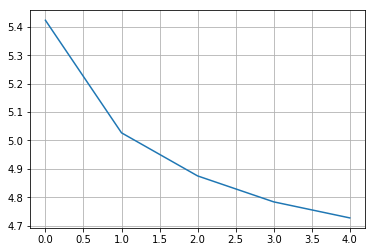

0.9654846
320


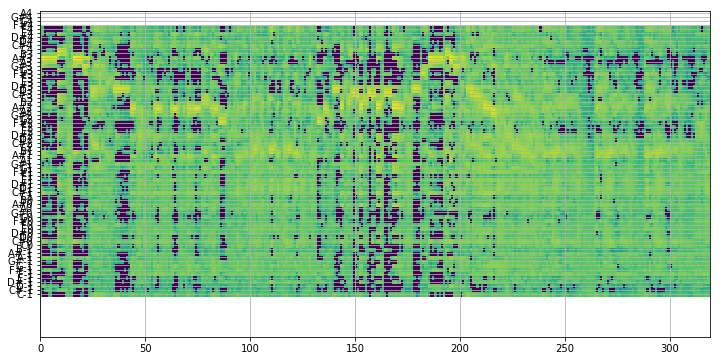

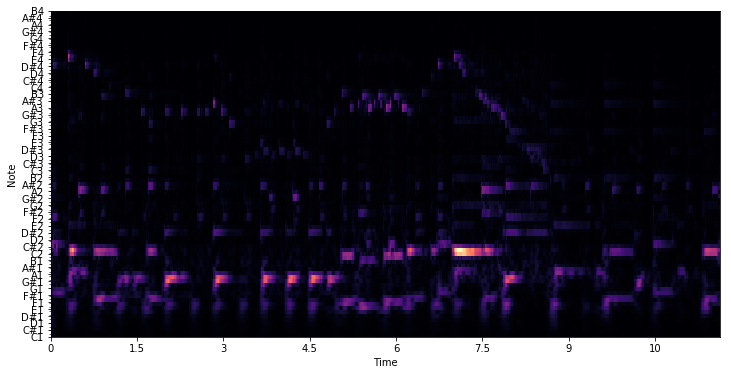

In [27]:
mdl.load_weights('init.w')
import util_nn
import util_midi
from pymisca.optimizer import *
model = mdl

bsize=  128
# gen = make_gen(cDATA,bsize)()
sperEPC = 500
gen = createBatchGenerator(cDATA,bsize)
# opt_par = {'lr': 0.001, 'momentum': 0.005,'decay':0.000} 
# opt = keras.optimizers.adadelta()
# opt = UGD(lr=0.5,momentum=0.5,
#           alpha=0.0,
#           norm=0.)
# opt = keras.optimizers.adam()
# opt = Adabs(epsilon=1E-6)
# opt = Adanorm()
eta = 5.
opt = Adamean(lr=eta,eta=eta)

# opt = keras.optimizers.adadelta(lr=eta,rho = eta/(eta+1))
print opt.get_config()
print 'learning rate:%.3E'%K.eval(opt.lr)

LOSS = abs_KL_div
# LOSS = keras.losses.kullback_leibler_divergence
Xs,Ys = cDATA
graph  = 0

model.compile(loss=LOSS, optimizer=opt
                     ,metrics=['accuracy'])
print model.evaluate(*subsample(cDATA,int(10E3)))
if 1:

    r = model.fit(*subsample(cDATA,sperEPC*bsize), batch_size = bsize,
#     r = model.fit_generator(gen,steps_per_epoch= sperEPC,workers=6,use_multiprocessing=1,
#                                   workers=5,
                                  epochs=5,
#                         initial_epoch=IniEPOCH, 
#                         batch_size=320,
#                         steps_per_epoch= sperEPC,
#                         validation_split=0.2,
                        shuffle = 1,
                        verbose = 1,
                        callbacks=None)
    print model.evaluate(*subsample(cDATA,int(10E3)))
#     IniEPOCH += nepc
    try:
        plot_model_loss(r)        
    except Exception as e:
        print e
    plt.grid()
    plt.show()

evaluate(model,YLIM=[-10,70])
model.save_weights('temp.w')

### Initial: Adamean.w, jsbach

##### Optimiser: adamean
{'epsilon': 1e-08, 'eta': 10.0, 'lr': 10.0, 'decay': 0.0}
learning rate:1.000E+01
10000/10000 [==============================] - 3s 296us/step
[9.071702117156983, 0.0533]
Epoch 1/5
64000/64000 [==============================] - 33s 515us/step - loss: 7.9970 - acc: 0.0660
Epoch 2/5
64000/64000 [==============================] - 31s 484us/step - loss: 7.6859 - acc: 0.0728
Epoch 3/5
64000/64000 [==============================] - 31s 484us/step - loss: 7.5832 - acc: 0.0776
Epoch 4/5
64000/64000 [==============================] - 31s 483us/step - loss: 7.5299 - acc: 0.0815
Epoch 5/5
64000/64000 [==============================] - 32s 493us/step - loss: 7.5080 - acc: 0.0843
10000/10000 [==============================] - 2s 224us/step
[7.482824711608886, 0.0838]
'val_loss'


{'epsilon': 1e-08, 'eta': 5.0, 'lr': 5.0, 'decay': 0.0}
learning rate:5.000E+00
10000/10000 [==============================] - 3s 309us/step
[9.139505616760253, 0.0512]
Epoch 1/5
64000/64000 [==============================] - 33s 515us/step - loss: 7.7587 - acc: 0.0781
Epoch 2/5
64000/64000 [==============================] - 31s 481us/step - loss: 7.6316 - acc: 0.0790
Epoch 3/5
64000/64000 [==============================] - 31s 483us/step - loss: 7.5753 - acc: 0.0835
Epoch 4/5
64000/64000 [==============================] - 31s 485us/step - loss: 7.5269 - acc: 0.0842
Epoch 5/5
64000/64000 [==============================] - 31s 486us/step - loss: 7.4964 - acc: 0.0876
10000/10000 [==============================] - 2s 219us/step
[7.4888787246704105, 0.0914]
'val_loss'

## Adadelta

{'epsilon': 1e-08, 'lr': 1.0, 'rho': 0.95, 'decay': 0.0}
learning rate:1.000E+00
10000/10000 [==============================] - 3s 338us/step
[9.011020529174806, 0.0577]
Epoch 1/5
64000/64000 [==============================] - 33s 522us/step - loss: 7.8107 - acc: 0.0752
Epoch 2/5
64000/64000 [==============================] - 31s 478us/step - loss: 7.6842 - acc: 0.0772
Epoch 3/5
64000/64000 [==============================] - 31s 478us/step - loss: 7.6371 - acc: 0.0809
Epoch 4/5
64000/64000 [==============================] - 31s 480us/step - loss: 7.6098 - acc: 0.0816
Epoch 5/5
64000/64000 [==============================] - 31s 478us/step - loss: 7.5861 - acc: 0.0838
10000/10000 [==============================] - 2s 219us/step
[7.601667546081543, 0.0756]
'val_loss'


{'epsilon': 1e-08, 'lr': 5.0, 'rho': 0.8333333333333334, 'decay': 0.0}
learning rate:5.000E+00
10000/10000 [==============================] - 3s 343us/step
[9.164594032287598, 0.0523]
Epoch 1/5
64000/64000 [==============================] - 33s 509us/step - loss: 7.8716 - acc: 0.0692
Epoch 2/5
64000/64000 [==============================] - 30s 466us/step - loss: 7.7049 - acc: 0.0737
Epoch 3/5
64000/64000 [==============================] - 30s 465us/step - loss: 7.6431 - acc: 0.0776
Epoch 4/5
64000/64000 [==============================] - 30s 464us/step - loss: 7.6206 - acc: 0.0797
Epoch 5/5
64000/64000 [==============================] - 30s 467us/step - loss: 7.6024 - acc: 0.0818
10000/10000 [==============================] - 2s 219us/step
[7.519011457824707, 0.0788]
'val_loss'




### Initial: init.w
### Data: artificial
### Best: 10,10

{'epsilon': 1e-08, 'eta': 5.0, 'lr': 5.0, 'decay': 0.0}
learning rate:5.000E+00
10000/10000 [==============================] - 3s 341us/step
[10.929902494812012, 0.0194]
Epoch 1/5
64000/64000 [==============================] - 34s 539us/step - loss: 5.4232 - acc: 0.1035
Epoch 2/5
64000/64000 [==============================] - 31s 487us/step - loss: 5.0266 - acc: 0.2039
Epoch 3/5
64000/64000 [==============================] - 31s 489us/step - loss: 4.8749 - acc: 0.2369
Epoch 4/5
64000/64000 [==============================] - 31s 488us/step - loss: 4.7835 - acc: 0.2527
Epoch 5/5
64000/64000 [==============================] - 31s 488us/step - loss: 4.7269 - acc: 0.2625
10000/10000 [==============================] - 2s 220us/step
[4.707854726409912, 0.2699]
'val_loss'


{'epsilon': 1e-08, 'eta': 10.0, 'lr': 10.0, 'decay': 0.0}
10000/10000 [==============================] - 2s 240us/step
[11.035107725524902, 0.0157]
Epoch 1/5
64000/64000 [==============================] - 32s 497us/step - loss: 5.3686 - acc: 0.1304
Epoch 2/5
64000/64000 [==============================] - 31s 479us/step - loss: 4.8916 - acc: 0.2353
Epoch 3/5
64000/64000 [==============================] - 31s 482us/step - loss: 4.7376 - acc: 0.2699
Epoch 4/5
64000/64000 [==============================] - 31s 479us/step - loss: 4.6688 - acc: 0.2853
Epoch 5/5
64000/64000 [==============================] - 31s 482us/step - loss: 4.6516 - acc: 0.2904
10000/10000 [==============================] - 2s 214us/step
[4.603166928100586, 0.3037]
'val_loss'

{'epsilon': 1e-08, 'eta': 15.0, 'lr': 15.0, 'decay': 0.0}
learning rate:1.500E+01
10000/10000 [==============================] - 3s 271us/step
[11.075232336425781, 0.0156]
Epoch 1/5
64000/64000 [==============================] - 33s 508us/step - loss: 5.7670 - acc: 0.1148
Epoch 2/5
64000/64000 [==============================] - 31s 487us/step - loss: 4.9296 - acc: 0.2099
Epoch 3/5
64000/64000 [==============================] - 31s 485us/step - loss: 4.7398 - acc: 0.2497
Epoch 4/5
64000/64000 [==============================] - 31s 482us/step - loss: 4.6473 - acc: 0.2682
Epoch 5/5
64000/64000 [==============================] - 31s 483us/step - loss: 4.5934 - acc: 0.2819
10000/10000 [==============================] - 2s 215us/step
[4.499814479827881, 0.2904]
'val_loss'

{'epsilon': 1e-08, 'eta': 20.0, 'lr': 20.0, 'decay': 0.0}
learning rate:2.000E+01
10000/10000 [==============================] - 3s 280us/step
[11.090192178344726, 0.0171]
Epoch 1/5
64000/64000 [==============================] - 28s 439us/step - loss: 12.2717 - acc: 0.0282
Epoch 2/5
64000/64000 [==============================] - 26s 403us/step - loss: 12.2121 - acc: 0.0287
Epoch 3/5
64000/64000 [==============================] - 26s 403us/step - loss: 12.2102 - acc: 0.0293
Epoch 4/5
64000/64000 [==============================] - 26s 402us/step - loss: 12.1982 - acc: 0.0284
Epoch 5/5
64000/64000 [==============================] - 26s 404us/step - loss: 12.1779 - acc: 0.0252
10000/10000 [==============================] - 2s 216us/step
[12.331249752807617, 0.0297]
'val_loss'

learning rate:1.000E+01
10000/10000 [==============================] - 4s 384us/step
[11.21302866821289, 0.021]
Epoch 1/5
64000/64000 [==============================] - 33s 521us/step - loss: 5.5412 - acc: 0.1293
Epoch 2/5
64000/64000 [==============================] - 31s 486us/step - loss: 5.1363 - acc: 0.2228
Epoch 3/5
64000/64000 [==============================] - 31s 481us/step - loss: 5.0854 - acc: 0.2427
Epoch 4/5
64000/64000 [==============================] - 31s 484us/step - loss: 5.1293 - acc: 0.2428
Epoch 5/5
64000/64000 [==============================] - 31s 484us/step - loss: 5.2312 - acc: 0.2368
10000/10000 [==============================] - 2s 213us/step
[5.258644273376465, 0.2407]
'val_loss'



In [22]:
 print model.evaluate(*subsample(cDATA,int(5E4)))

50000/50000 [==============================] - 11s 211us/step
[4.803525249633789, 0.22766]


In [ ]:
print 'Done'

In [9]:
! mv temp.w Models/Adamean.w


#### ADAM
learning rate:1.000E-03
10000/10000 [==============================] - 2s 240us/step
[17.586441513061523, 0.0134]
Epoch 1/15
500/500 [==============================] - 31s 63ms/step - loss: 5.8144 - acc: 0.0868
Epoch 2/15
500/500 [==============================] - 30s 61ms/step - loss: 5.2607 - acc: 0.1454
Epoch 3/15
500/500 [==============================] - 30s 60ms/step - loss: 5.0298 - acc: 0.1985
Epoch 4/15
500/500 [==============================] - 30s 60ms/step - loss: 5.0783 - acc: 0.1909
Epoch 5/15
500/500 [==============================] - 30s 61ms/step - loss: 4.8851 - acc: 0.2267
Epoch 6/15
500/500 [==============================] - 30s 61ms/step - loss: 4.9149 - acc: 0.2231
Epoch 7/15
500/500 [==============================] - 31s 61ms/step - loss: 5.0859 - acc: 0.1786
Epoch 8/15
500/500 [==============================] - 31s 61ms/step - loss: 4.9331 - acc: 0.2128
Epoch 9/15
500/500 [==============================] - 31s 61ms/step - loss: 4.9177 - acc: 0.2139
Epoch 10/15
500/500 [==============================] - 31s 61ms/step - loss: 4.7899 - acc: 0.2423
Epoch 11/15
500/500 [==============================] - 31s 61ms/step - loss: 4.7174 - acc: 0.2549
Epoch 12/15
500/500 [==============================] - 31s 61ms/step - loss: 4.5877 - acc: 0.2720
Epoch 13/15
500/500 [==============================] - 31s 62ms/step - loss: 4.6861 - acc: 0.2554
Epoch 14/15
500/500 [==============================] - 31s 62ms/step - loss: 4.6488 - acc: 0.2665
Epoch 15/15
500/500 [==============================] - 31s 62ms/step - loss: 4.4899 - acc: 0.2919
10000/10000 [==============================] - 2s 215us/step
[4.465160980987549, 0.2947]
'val_loss'


## Adadelta
learning rate:1.000E+00
10000/10000 [==============================] - 2s 250us/step
[17.556231410217286, 0.0193]
Epoch 1/15
500/500 [==============================] - 32s 65ms/step - loss: 5.8970 - acc: 0.0776
Epoch 2/15
500/500 [==============================] - 31s 62ms/step - loss: 5.3103 - acc: 0.1379
Epoch 3/15
500/500 [==============================] - 31s 62ms/step - loss: 5.1290 - acc: 0.1734
Epoch 4/15
500/500 [==============================] - 31s 62ms/step - loss: 5.0396 - acc: 0.1958
Epoch 5/15
500/500 [==============================] - 31s 62ms/step - loss: 4.9733 - acc: 0.2112
Epoch 6/15
500/500 [==============================] - 31s 62ms/step - loss: 4.9088 - acc: 0.2255
Epoch 7/15
500/500 [==============================] - 31s 63ms/step - loss: 4.8626 - acc: 0.2320
Epoch 8/15
500/500 [==============================] - 31s 62ms/step - loss: 4.8114 - acc: 0.2384
Epoch 9/15
500/500 [==============================] - 31s 62ms/step - loss: 4.7833 - acc: 0.2480
Epoch 10/15
500/500 [==============================] - 31s 62ms/step - loss: 4.7489 - acc: 0.2523
Epoch 11/15
500/500 [==============================] - 31s 62ms/step - loss: 4.7141 - acc: 0.2543
Epoch 12/15
500/500 [==============================] - 31s 62ms/step - loss: 4.6923 - acc: 0.2539
Epoch 13/15
500/500 [==============================] - 31s 62ms/step - loss: 4.6598 - acc: 0.2609
Epoch 14/15
500/500 [==============================] - 31s 62ms/step - loss: 4.6512 - acc: 0.2657
Epoch 15/15
500/500 [==============================] - 31s 62ms/step - loss: 4.6320 - acc: 0.2677
10000/10000 [==============================] - 2s 218us/step
[4.582991618347168, 0.2674]

## Adanorm
Epoch 1/15
500/500 [==============================] - 34s 67ms/step - loss: 5.6084 - acc: 0.0565
Epoch 2/15
500/500 [==============================] - 31s 63ms/step - loss: 5.2951 - acc: 0.1209
Epoch 3/15
500/500 [==============================] - 32s 63ms/step - loss: 5.1506 - acc: 0.1561
Epoch 4/15
500/500 [==============================] - 32s 64ms/step - loss: 5.0808 - acc: 0.1715
Epoch 5/15
500/500 [==============================] - 32s 64ms/step - loss: 5.0292 - acc: 0.1892
Epoch 6/15
500/500 [==============================] - 32s 64ms/step - loss: 4.9546 - acc: 0.2049
Epoch 7/15
500/500 [==============================] - 32s 64ms/step - loss: 4.9526 - acc: 0.2125
Epoch 8/15
500/500 [==============================] - 32s 64ms/step - loss: 4.9001 - acc: 0.2228
Epoch 9/15
500/500 [==============================] - 32s 64ms/step - loss: 4.8631 - acc: 0.2300
Epoch 10/15
500/500 [==============================] - 32s 64ms/step - loss: 4.8549 - acc: 0.2342
Epoch 11/15
500/500 [==============================] - 32s 64ms/step - loss: 4.8164 - acc: 0.2425
Epoch 12/15
500/500 [==============================] - 32s 64ms/step - loss: 4.7841 - acc: 0.2518
Epoch 13/15
500/500 [==============================] - 32s 64ms/step - loss: 4.7594 - acc: 0.2568
Epoch 14/15
500/500 [==============================] - 32s 64ms/step - loss: 4.7502 - acc: 0.2556
Epoch 15/15
500/500 [==============================] - 32s 65ms/step - loss: 4.7073 - acc: 0.2624
10000/10000 [==============================] - 2s 211us/step
[4.75618226852417, 0.2582]
'val_loss'

## ADAMEAN
10000/10000 [==============================] - 4s 384us/step
[11.03502459564209, 0.0162]

10000/10000 [==============================] - 2s 229us/step
[11.024426483154297, 0.0169]
Epoch 1/15
500/500 [==============================] - 32s 64ms/step - loss: 5.5804 - acc: 0.1058
Epoch 2/15
500/500 [==============================] - 31s 63ms/step - loss: 4.9216 - acc: 0.1964
Epoch 3/15
500/500 [==============================] - 31s 63ms/step - loss: 4.7784 - acc: 0.2298
Epoch 4/15
500/500 [==============================] - 31s 63ms/step - loss: 4.6776 - acc: 0.2443
Epoch 5/15
500/500 [==============================] - 31s 63ms/step - loss: 4.6201 - acc: 0.2598
Epoch 6/15
500/500 [==============================] - 31s 63ms/step - loss: 4.6008 - acc: 0.2618
Epoch 7/15
500/500 [==============================] - 31s 63ms/step - loss: 4.5653 - acc: 0.2691
Epoch 8/15
500/500 [==============================] - 32s 63ms/step - loss: 4.5279 - acc: 0.2728
Epoch 9/15
500/500 [==============================] - 32s 63ms/step - loss: 4.5171 - acc: 0.2718
Epoch 10/15
500/500 [==============================] - 32s 63ms/step - loss: 4.5433 - acc: 0.2700
Epoch 11/15
500/500 [==============================] - 32s 64ms/step - loss: 4.4562 - acc: 0.2826
Epoch 12/15
500/500 [==============================] - 32s 64ms/step - loss: 4.4608 - acc: 0.2863
Epoch 13/15
500/500 [==============================] - 32s 63ms/step - loss: 4.4238 - acc: 0.2845
Epoch 14/15
500/500 [==============================] - 31s 63ms/step - loss: 4.3883 - acc: 0.2913
Epoch 15/15
500/500 [==============================] - 32s 63ms/step - loss: 4.4044 - acc: 0.2932
10000/10000 [==============================] - 2s 213us/step
[4.795018204498291, 0.2258]

In [6]:
#### adam 0.23 after 5 epochs
model.save_weights('Models/%s.w'%opt.__class__)

10000/10000 [==============================] - 2s 213us/step
[4.687237120056152, 0.2675]
0.9654846
320


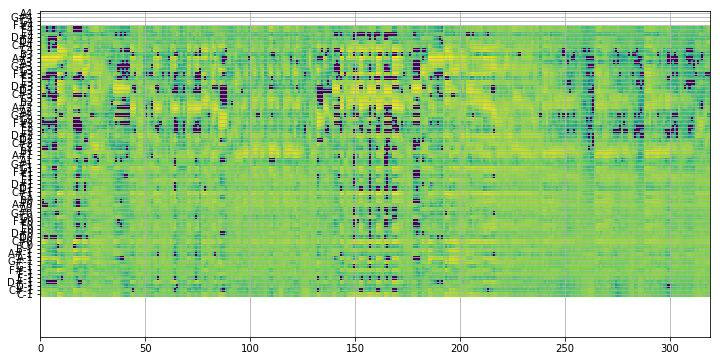

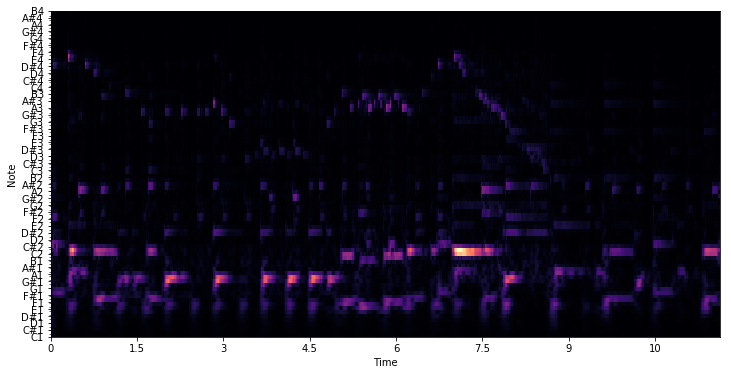

array([[0.        , 0.00269817, 0.00364238, ..., 0.06892622, 0.03220301,
        0.06415652],
       [0.        , 0.00582444, 0.00154318, ..., 0.25900305, 0.01821055,
        0.00893576],
       [0.        , 0.00323996, 0.0009992 , ..., 0.03442015, 0.06232436,
        0.01502511],
       ...,
       [0.        , 0.00284977, 0.00329257, ..., 0.02033821, 0.06648725,
        0.05802823],
       [0.        , 0.00243011, 0.00131906, ..., 0.05637851, 0.05845278,
        0.08749717],
       [0.        , 0.00217407, 0.00369219, ..., 0.02377792, 0.06983164,
        0.16959561]])

In [11]:
print model.evaluate(*subsample(cDATA,int(10E3)))
evaluate(model,YLIM=[-10,70])

27373
320


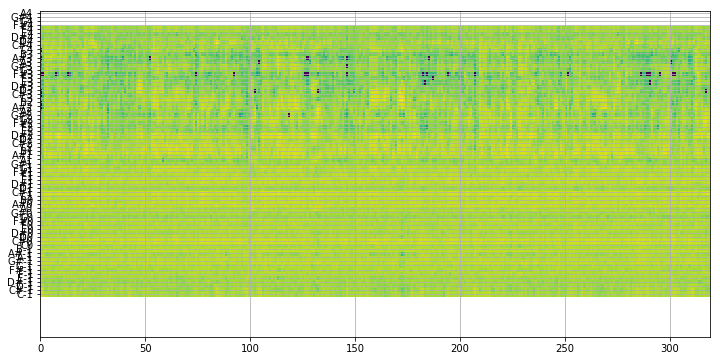

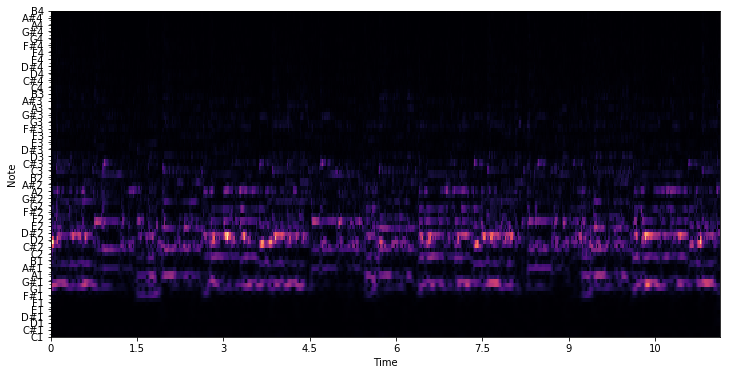

array([[0.        , 0.00828388, 0.00596423, ..., 0.02853726, 0.06837519,
        0.06255455],
       [0.        , 0.0055296 , 0.00580601, ..., 0.02265633, 0.03826188,
        0.07123015],
       [0.        , 0.00114558, 0.00325139, ..., 0.12764006, 0.04928815,
        0.11593465],
       ...,
       [0.        , 0.00222885, 0.00308562, ..., 0.03271085, 0.07245952,
        0.06118661],
       [0.        , 0.00089629, 0.00191615, ..., 0.09044541, 0.15562464,
        0.10165856],
       [0.        , 0.00083211, 0.00215954, ..., 0.04576425, 0.08185118,
        0.09027481]])

In [10]:
# ??evaluate
evaluate(model,wavfile='sample/Tamacun.wav',YLIM=[-10,70])

In [10]:
d = np.load('sample/MIDI/artificial/0P0S0.both.npy').tolist()
# print
mroll =d[1]

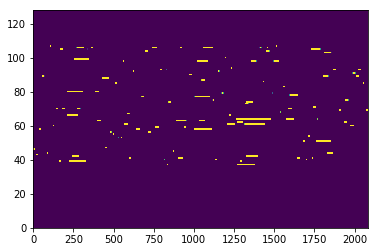

In [11]:
# mroll = cDATA[1]
# print mroll.shape
plt.pcolormesh(mroll[:3000].T)
plt.show()

In [12]:
def enlarge(IN,rd=0):
    if isinstance(IN,np.ndarray):
        x = IN.tolist()
    x = IN[:]
    x[0] = x[0] - rd
    x[1] = x[1] + rd
    return x

In [13]:
# from evaluator import *
print span
enlarge(span,10)
print span

[36, 102]
[36, 102]


0.9654846
320


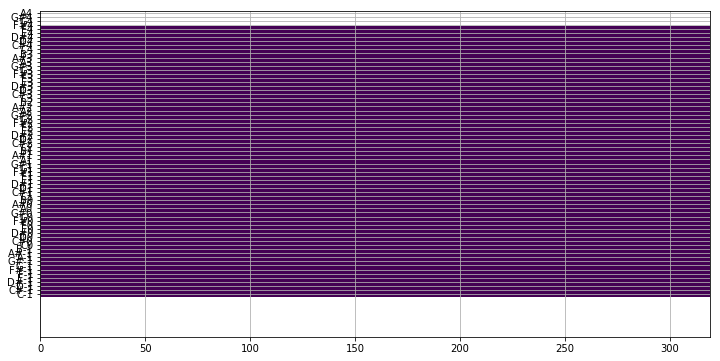

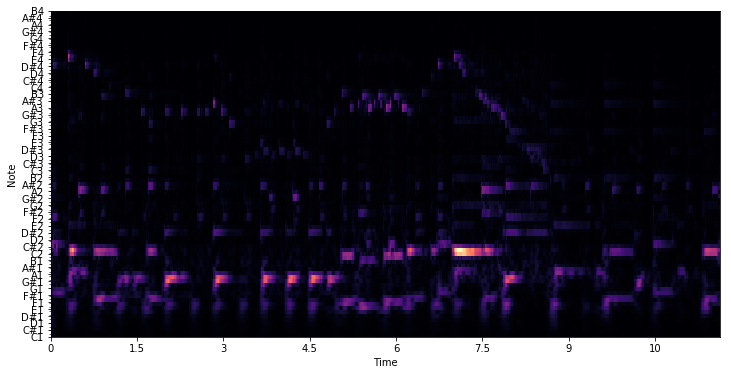

array([[0.00000000e+00, 1.00000001e-10, 2.00000003e-10, ...,
        6.30000008e-09, 6.40000009e-09, 6.50000009e-09],
       [0.00000000e+00, 1.00000001e-10, 2.00000003e-10, ...,
        6.30000008e-09, 6.40000009e-09, 6.50000009e-09],
       [0.00000000e+00, 1.00000001e-10, 2.00000003e-10, ...,
        6.30000008e-09, 6.40000009e-09, 6.50000009e-09],
       ...,
       [0.00000000e+00, 1.00000001e-10, 2.00000003e-10, ...,
        6.30000008e-09, 6.40000009e-09, 6.50000009e-09],
       [0.00000000e+00, 1.00000001e-10, 2.00000003e-10, ...,
        6.30000008e-09, 6.40000009e-09, 6.50000009e-09],
       [0.00000000e+00, 1.00000001e-10, 2.00000003e-10, ...,
        6.30000008e-09, 6.40000009e-09, 6.50000009e-09]])

In [14]:
evaluate(model,YLIM=[-10,70])